# 🚀 Tutorial Completo: Google Agent Development Kit (ADK)

## 🎯 Introducción al Desarrollo de Agentes de IA con Google ADK


### 📋 ¿Qué aprenderás en este tutorial?

1. **¿Qué es el ADK de Google?** - Conceptos fundamentales
2. **Ventajas clave del ADK** - Por qué usarlo
3. **Instalación y configuración** - Preparar tu entorno
4. **Componentes principales** - Arquitectura del ADK
5. **Tu primer agente** - Crear un agente funcional
6. **¡Creemos un agente que podamos desplegar!** - Agente de clima y tiempo funcional

---

### 👤 Sobre este Tutorial

Este notebook está diseñado para ser una guía práctica y completa del Agent Development Kit (ADK) de Google. Podrás ejecutar todo el código directamente en Google Colab.

**Requisitos previos:**
- Conocimientos básicos de Python
- Cuenta de Google (para Colab)
- API Key de Google AI Studio (la obtendremos juntos)

## 📚 Parte 1: ¿Qué es el Agent Development Kit (ADK)?

### Definición

El **Agent Development Kit (ADK)** es un framework de código abierto de Google diseñado para simplificar el desarrollo de agentes y sistemas multiagente inteligentes.

### Características Principales:

- 🤖 **Multiagente por diseño**: Construye sistemas donde múltiples agentes colaboran
- 🔧 **Flexible y modular**: Usa cualquier modelo de IA (Gemini, Claude, GPT, etc.)
- 🛠️ **Herramientas integradas**: Búsqueda, ejecución de código, y más
- 🚀 **Listo para producción**: Usado internamente por Google
- 📊 **Orquestación avanzada**: Control preciso sobre flujos de trabajo

### ¿Por qué es importante?

El ADK representa un cambio de paradigma: pasamos de modelos únicos a **sistemas de agentes especializados** que colaboran para resolver problemas complejos.

In [27]:
# Celda de verificación del entorno
import sys
import os
from datetime import datetime

print("🎉 ¡Bienvenido al Tutorial de Google ADK!")
print(f"\n📅 Fecha: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print(f"🐍 Versión de Python: {sys.version.split()[0]}")
print(f"💻 Entorno: Google Colab" if 'google.colab' in sys.modules else "💻 Entorno: Local")
print("\n✅ ¡Entorno listo para comenzar!")

🎉 ¡Bienvenido al Tutorial de Google ADK!

📅 Fecha: 2025-06-23 00:37
🐍 Versión de Python: 3.9.21
💻 Entorno: Local

✅ ¡Entorno listo para comenzar!


## 🎯 Parte 2: Ventajas Clave del ADK

### 1. 🤝 Multiagente por Diseño
- Crea sistemas donde agentes especializados colaboran
- Orquestación paralela, secuencial o jerárquica
- Modularidad y escalabilidad integradas

### 2. 🔄 Flexibilidad de Modelos
- Compatible con Gemini, Claude, GPT, Llama, y más
- Integración con LiteLLM para máxima compatibilidad
- Cambio de modelos sin modificar la arquitectura

### 3. 🛠️ Ecosistema de Herramientas
- Herramientas preconstruidas (búsqueda, código, etc.)
- Funciones personalizadas fáciles de crear
- Integración con LangChain y LlamaIndex

### 4. 🎼 Orquestación Flexible
- Agentes de flujo de trabajo (workflow agents)
- Enrutamiento dinámico con LLM
- Control preciso del comportamiento

### 5. 🚀 Experiencia de Desarrollo
- CLI y UI web integradas
- Depuración visual
- Evaluación incorporada
- Despliegue simplificado

## ⚙️ Parte 3: Instalación y Configuración

### Paso 1: Instalar el ADK de Google

In [28]:
# Instalar Google ADK
print("📦 Instalando Google ADK...")
!pip install -qU google-adk==1.4.2

# Instalar dependencias adicionales útiles
!pip install -qU python-dotenv

print("\n✅ Instalación completada!")

# Verificar la instalación
!pip show google-adk | grep -E "Name:|Version:"

📦 Instalando Google ADK...

✅ Instalación completada!
Name: google-adk
Version: 1.4.2


_____

### Paso 2: Configurar las Credenciales

Para usar modelos de Google (como Gemini), necesitas una API Key.

#### 🔑 Obtener tu API Key:
1. Ve a [Google AI Studio](https://aistudio.google.com/apikey)
2. Crea o selecciona un proyecto
3. Genera una nueva API Key
4. Cópiala y pégala en la celda siguiente

#### Opcion 1: Ingresa el api de manera manual

In [29]:
# Configurar credenciales de forma segura
import os
from getpass import getpass

# Solicitar API Key de forma segura
if 'GOOGLE_API_KEY' not in os.environ:
    print("🔑 Por favor, ingresa tu Google API Key:")
    api_key = getpass("API Key: ")
    os.environ['GOOGLE_API_KEY'] = api_key
    os.environ['GOOGLE_GENAI_USE_VERTEXAI'] = 'FALSE'
    print("\n✅ API Key configurada correctamente")
else:
    print("✅ API Key ya configurada")

# Verificar que las variables estén configuradas
print(f"\n📋 Variables de entorno configuradas:")
print(f"   - GOOGLE_API_KEY: {'✓' if os.environ.get('GOOGLE_API_KEY') else '✗'}")
print(f"   - GOOGLE_GENAI_USE_VERTEXAI: {os.environ.get('GOOGLE_GENAI_USE_VERTEXAI', 'No configurado')}")

✅ API Key ya configurada

📋 Variables de entorno configuradas:
   - GOOGLE_API_KEY: ✗
   - GOOGLE_GENAI_USE_VERTEXAI: FALSE


#### Opcion 2 - Dotenv

In [30]:
from dotenv import load_dotenv
# Cargar variables de entorno desde .env si existe
load_dotenv(override=True)

True

_____

## 🏗️ Parte 4: Componentes Principales del ADK

### Arquitectura del ADK

```
┌─────────────────────────────────────────────┐
│              Google ADK                     │
├─────────────────────────────────────────────┤
│                                             │
│  ┌─────────┐  ┌─────────┐  ┌─────────┐      │
│  │ Agentes │  │  Tools  │  │Sessions │      │
│  └────┬────┘  └────┬────┘  └────┬────┘      │
│       │            │            │           │
│  ┌────┴────────────┴────────────┴─────┐     │
│  │              Runners               │     │
│  └────────────────────────────────────┘     │
│                                             │
└─────────────────────────────────────────────┘
```

### Componentes Clave:

1. **🤖 Agentes (Agents)**
   - `LlmAgent`: Agente impulsado por LLM
   - `WorkflowAgent`: Orquestador de otros agentes
   - Tipos especializados: Sequential, Parallel, Loop

2. **🔧 Herramientas (Tools)**
   - Funciones que los agentes pueden usar
   - Preconstruidas: búsqueda, código, etc.
   - Personalizables según necesidades

3. **▶️ Ejecutores (Runners)**
   - Gestionan el flujo de ejecución
   - Manejan mensajes y eventos
   - Controlan el estado

4. **💾 Sesiones (Sessions)**
   - Mantienen contexto entre interacciones
   - Persisten información importante
   - Habilitan conversaciones continuas

_____

## 🎈 Parte 5: ¡Tu Primer Agente con ADK!

### Crear un Agente Simple

Vamos a crear nuestro primer agente: un asistente que puede buscar información en Google.

In [32]:
from google.adk.agents import Agent
from google.adk.runners import Runner
from google.adk.sessions import InMemorySessionService
from google.adk.tools import google_search
from google.genai import types

In [33]:
agent_search = Agent(
    name="AgenteBuscadorSimple",
    model="gemini-2.5-flash",  # Modelo rápido y eficiente
    description="Un agente amigable que puede buscar información actualizada en Google.",
    tools=[google_search], # Herramienta de búsqueda
    instruction=(
        "Eres un asistente amigable y útil."
        "Cuando se te haga una pregunta, usa la herramienta de búsqueda de Google si es necesario."
        "Proporciona respuestas concisas y claras."
        "Si no estás seguro, busca información actualizada."
        "Siempre sé educado y profesional."
    )
)

In [34]:
# Concepto clave: SessionService almacena el historial y estado de la conversación.
# InMemorySessionService es un almacenamiento simple y no persistente para este tutorial.
session_service = InMemorySessionService()

# Definir constantes para identificar el contexto de la interacción
APP_NAME = "mi_primer_agente"
USER_ID = "user_1"
SESSION_ID = "session_001" # Usando un ID fijo por simplicidad

# Crear la sesión específica donde ocurrirá la conversación
session = await session_service.create_session(
    app_name=APP_NAME,
    user_id=USER_ID,
    session_id=SESSION_ID
)
print(f"Sesión creada: App='{APP_NAME}', Usuario='{USER_ID}', Sesión='{SESSION_ID}'")


Sesión creada: App='mi_primer_agente', Usuario='user_1', Sesión='session_001'


In [35]:
# Runner: Este es el componente principal que gestiona la interacción con el agente.
runner = Runner(agent=agent_search,
                app_name=APP_NAME,
                session_service=session_service)

print(f"Runner creado para el agente '{runner.agent.name}'.")


Runner creado para el agente 'AgenteBuscadorSimple'.


In [36]:
# Ejemplo: Enviando mensajes al agente
events = runner.run(user_id=USER_ID,
          session_id=SESSION_ID,
          new_message=types.Content(role='user', parts=[types.Part(text="Quien eres?")]))

for event in events:
    if event.is_final_response():
        if event.grounding_metadata.grounding_chunks:
            for _ in event.grounding_metadata.grounding_chunks:
                print(f"Grounding Chunk: {_.web.title}")
        # Extraer la respuesta final del agente
        else:
            print("No es necesario el uso de grounding.")                 
        final_response = event.content.parts[0].text
        print("Agent Response: ", final_response)

No es necesario el uso de grounding.
Agent Response:  Soy un modelo de lenguaje grande, entrenado por Google.


In [37]:
# Ejemplo: Enviando mensajes al agente
events = runner.run(user_id=USER_ID,
          session_id=SESSION_ID,
          new_message=types.Content(role='user', parts=[types.Part(text="¿Cuáles son las últimas noticias sobre IA?")]))

for event in events:
    if event.is_final_response():
        if event.grounding_metadata.grounding_chunks:
            for _ in event.grounding_metadata.grounding_chunks:
                print(f"Grounding Chunk: {_.web.title}")
        # Extraer la respuesta final del agente
        else:
            print("No es necesario el uso de grounding.")                 
        final_response = event.content.parts[0].text
        print("Agent Response: ", final_response)

Grounding Chunk: xataka.com
Grounding Chunk: fundacionbankinter.org
Grounding Chunk: infobae.com
Grounding Chunk: securities.io
Grounding Chunk: lanacion.com.ar
Grounding Chunk: elcomercio.pe
Grounding Chunk: tn.com.ar
Grounding Chunk: aecoc.es
Grounding Chunk: exame.com
Grounding Chunk: imascono.com
Grounding Chunk: ina-pidte.ac.cr
Agent Response:  Las últimas noticias sobre inteligencia artificial (IA) muestran un rápido avance y una creciente integración en diversos aspectos de la vida cotidiana y los negocios.

Algunos de los desarrollos más recientes y las tendencias destacadas incluyen:

*   **IA en la vida cotidiana y los negocios:** La IA ya organiza las colas en parques de atracciones como Disney y Legoland para mejorar la eficiencia y la experiencia del cliente. Empresas como Amazon esperan que la IA reduzca su plantilla total en los próximos años, redefiniendo roles y demandas de habilidades en el mercado laboral.
*   **Avances en chips y hardware:** Apple está utilizando IA

### Comunicación con el agente usando `async`

Necesitamos una forma de enviar mensajes a nuestro agente y recibir sus respuestas. Dado que las llamadas a modelos de lenguaje (LLMs) y la ejecución de herramientas pueden tomar tiempo, el `Runner` del ADK funciona de manera asíncrona.

Vamos a definir una función auxiliar asíncrona (`call_agent_async`) que:

* Recibe una cadena de texto con la consulta del usuario.
* La empaqueta en el formato `Content` del ADK.
* Llama a `runner.run_async`, proporcionando el contexto del usuario/sesión y el nuevo mensaje.
* Itera a través de los `Events` generados por el `runner`. Los eventos representan pasos en la ejecución del agente (por ejemplo: solicitud de herramienta, recepción del resultado, pensamiento intermedio del LLM, respuesta final).
* Identifica e imprime el evento de respuesta final usando `event.is_final_response()`.

#### ¿Por qué usar `async`?

Las interacciones con LLMs y herramientas (como APIs externas) son operaciones dependientes de entrada/salida (I/O-bound). Usar `asyncio` permite manejar estas operaciones de forma eficiente sin bloquear la ejecución del programa.

---


In [38]:
async def call_agent_async(query: str, runner, user_id, session_id):
    """Envía una consulta al agente e imprime la respuesta final."""
    print(f"\n>>> Consulta del usuario: {query}")

    # Prepara el mensaje del usuario en el formato de ADK
    content = types.Content(role='user', parts=[types.Part(text=query)])

    final_response_text = "El agente no produjo una respuesta final." # Valor por defecto

    # Concepto clave: run_async ejecuta la lógica del agente y genera eventos.
    # Iteramos a través de los eventos para encontrar la respuesta final.
    async for event in runner.run_async(user_id=user_id, session_id=session_id, new_message=content):
        # Puedes descomentar la línea de abajo para ver *todos* los eventos durante la ejecución
        # print(f"  [Evento] Autor: {event.author}, Tipo: {type(event).__name__}, Final: {event.is_final_response()}, Contenido: {event.content}")

        # Concepto clave: is_final_response() marca el mensaje que concluye el turno.
        if event.is_final_response():
            if event.content and event.content.parts:
                # Se asume que la respuesta de texto está en la primera parte
                final_response_text = event.content.parts[0].text
            elif event.actions and event.actions.escalate: # Maneja posibles errores/escalamientos
                final_response_text = f"El agente escaló: {event.error_message or 'Sin mensaje específico.'}"
            # Agrega más validaciones aquí si es necesario (por ejemplo, códigos de error específicos)
            break # Deja de procesar eventos una vez encontrada la respuesta final

    print(f"<<< Respuesta del agente: {final_response_text}")


In [40]:
await call_agent_async("¿Cuáles son las últimas noticias sobre IA?...busca en internet si hace falta",
                        runner=runner,
                        user_id=USER_ID,
                        session_id=SESSION_ID)


>>> Consulta del usuario: ¿Cuáles son las últimas noticias sobre IA?...busca en internet si hace falta
<<< Respuesta del agente: La inteligencia artificial (IA) continúa su avance vertiginoso, con innovaciones y debates que marcan la pauta en diversos sectores. Aquí te presento un resumen de las últimas noticias sobre IA: 

 **1. Avances en Modelos y Capacidades:** 

 *   **IA Generativa Multimodal:** OpenAI lanzó GPT-4o, un nuevo modelo que integra y procesa texto, audio e imágenes simultáneamente, marcando un salto significativo en la capacidad multimodal de la IA. Esta IA generativa está remodelando industrias al crear contenido nuevo como texto, imágenes y música.
 *   **Mejoras en Motores de Búsqueda:** Gemini 1.5 Ultra de Google está optimizando la relevancia y precisión de los resultados de búsqueda, lo que facilita a los usuarios encontrar información de manera más rápida y eficiente.
 *   **Procesamiento del Lenguaje Natural (PLN):** Los avances recientes en PLN están mejoran

_____

## 🎈 Parte 6: ¡Antes de terminar creemos un agente que podamos desplegar!

### Crearemos el hola mundo de los agentes en formato .py

Vamos a crear nuestro primer capaz de identificar si llama a una funcion de tiempo o clima segun corresponda usando los entornos interactivos de ADK


### 🧭 Navega a la estructura del proyecto y ejecuta el comando adecuado

Asegúrate de ubicarte en el directorio correcto dentro del curso. Una vez allí, puedes ejecutar uno de los siguientes comandos según corresponda:

* Para abrir la interfaz web del agente:

  ```bash
  adk web
  ```

* Para ejecutar el agente directamente desde consola:

  ```bash
  adk run "Mi Primer Agente"
  ```

### 📂 Estructura esperada del proyecto:

```
Mi Primer Agente
├── __init__.py
└── agent.py
```

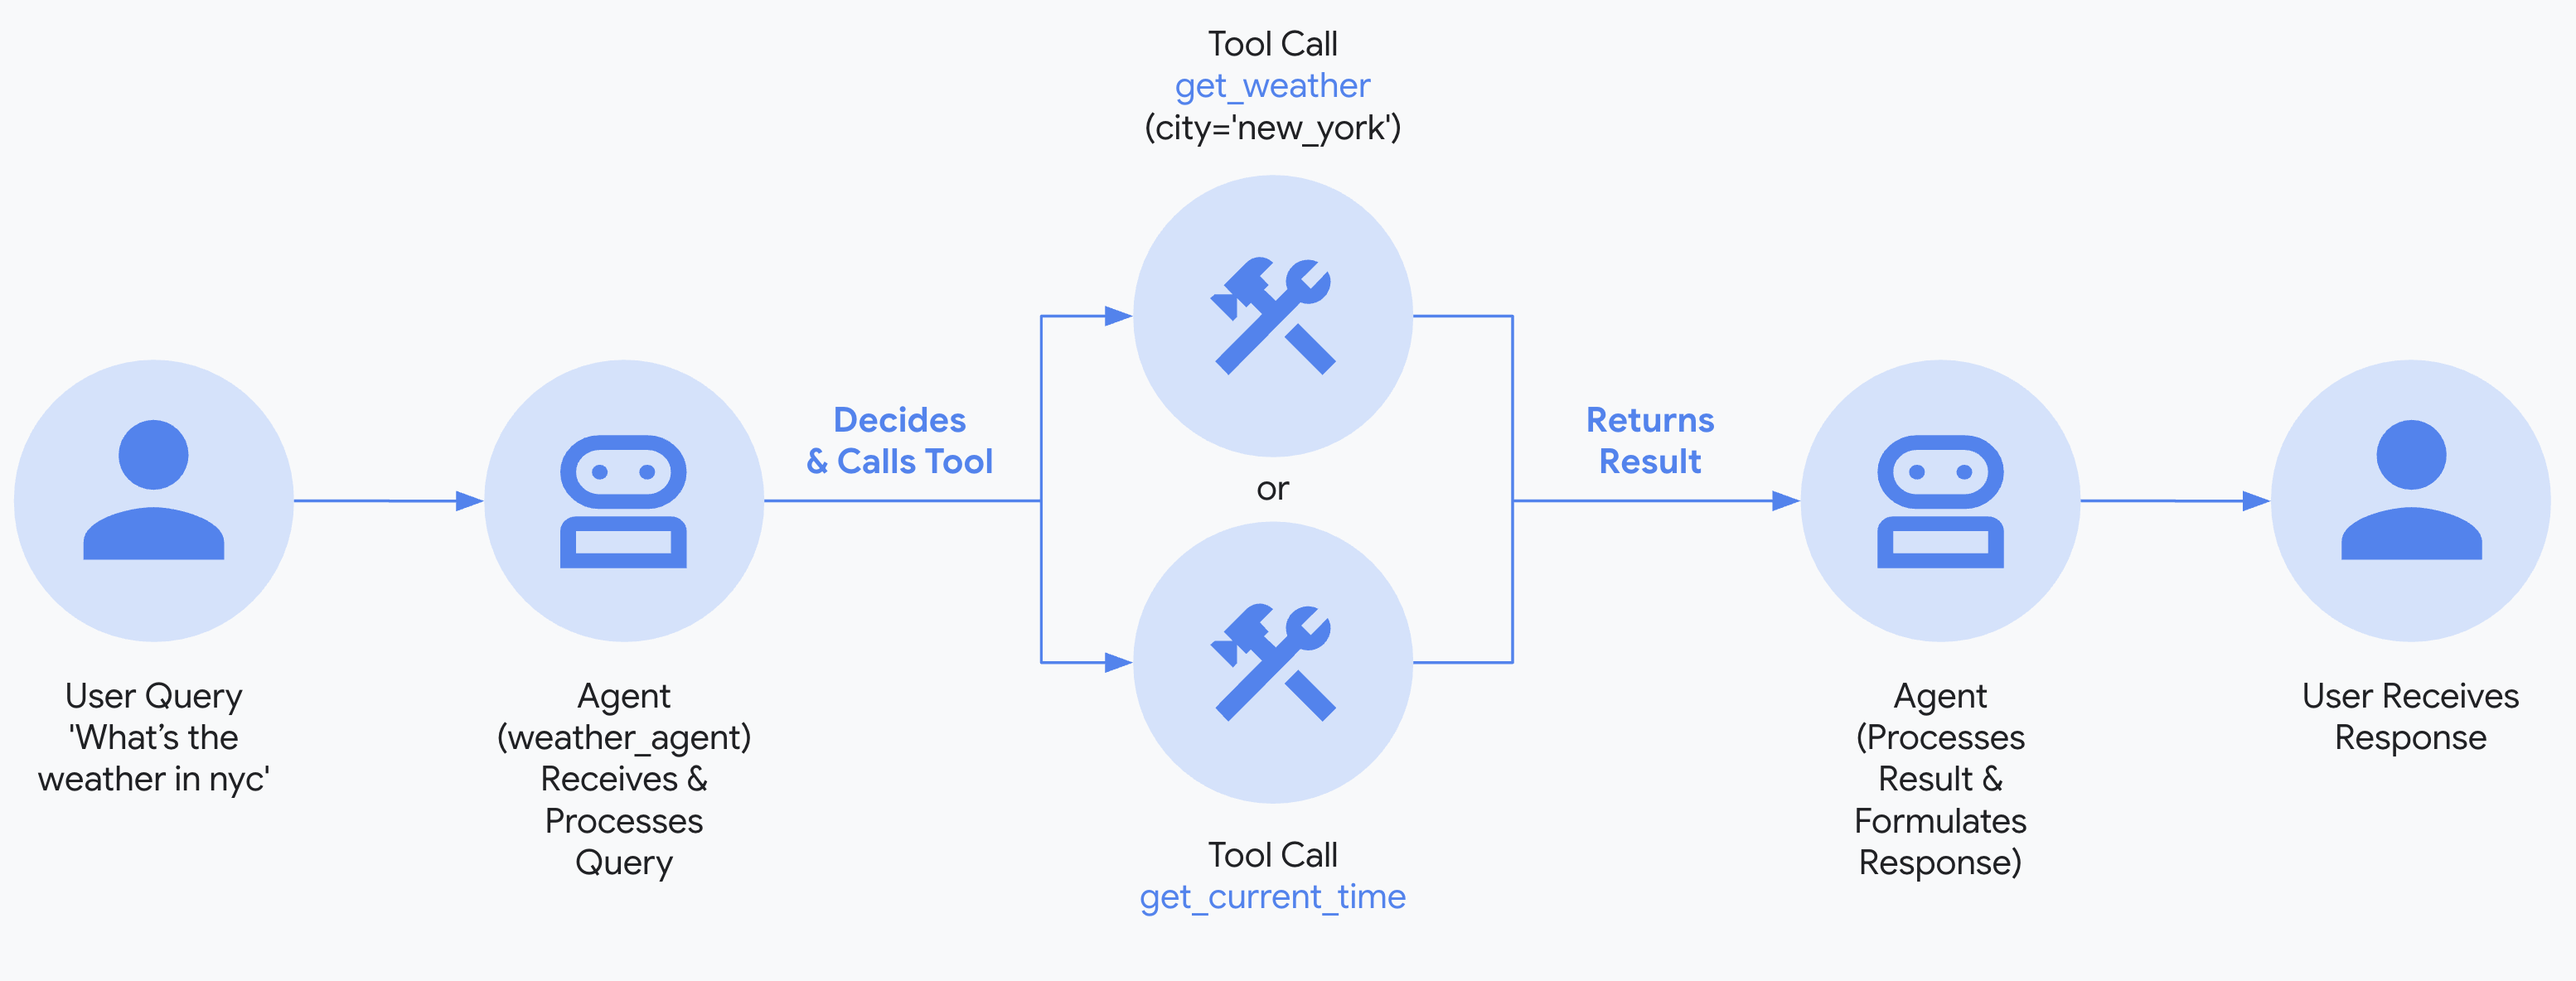

_____

## 🎓 Conclusión y Próximos Pasos

### 🎉 ¡Felicitaciones!

Has completado esta introducción completa al Google Agent Development Kit. Has aprendido:

✅ Qué es el ADK y sus ventajas clave

✅ Cómo instalar y configurar el entorno

✅ Los componentes principales de la arquitectura

✅ Cómo crear tu primer agente

✅ ADK run y ADK web

✅ Mejores prácticas para el desarrollo
